In [1]:
import pyclesperanto_prototype as cle
import numpy as np
import matplotlib.pyplot as plt

-2


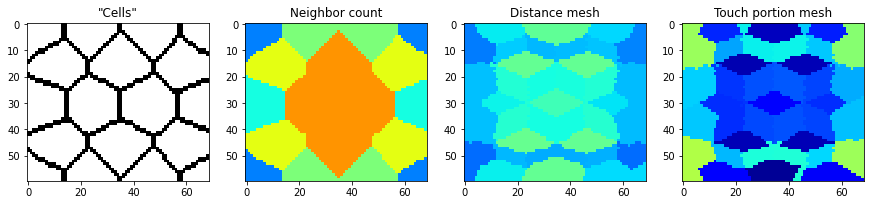

-1


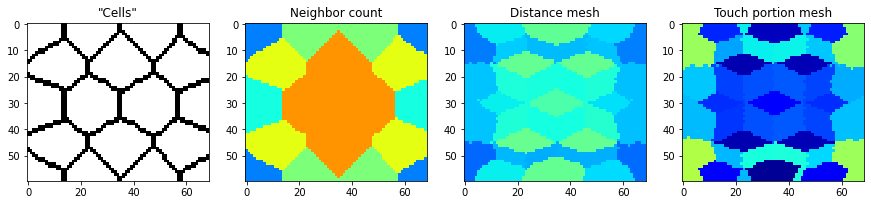

0


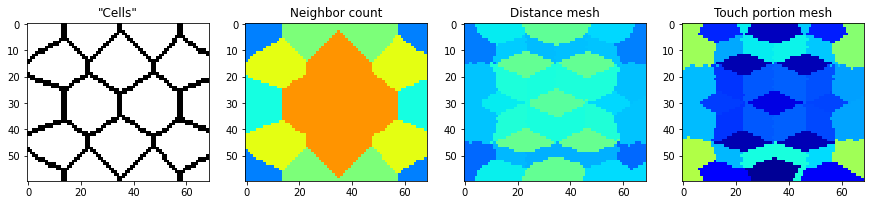

1


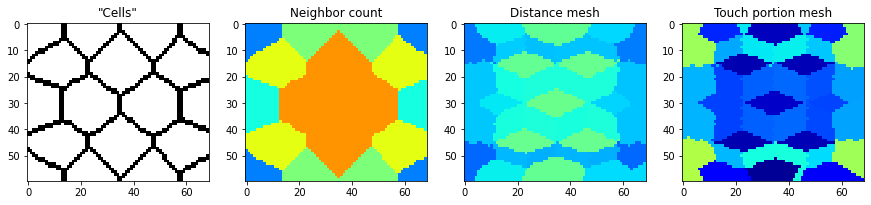

2


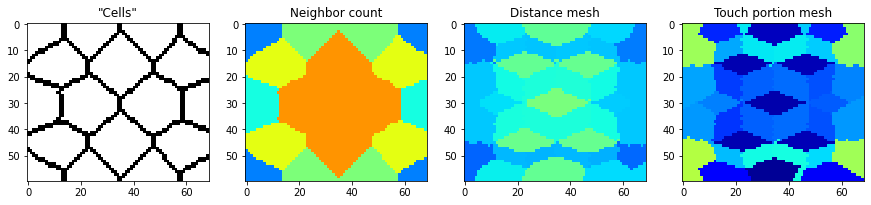

3


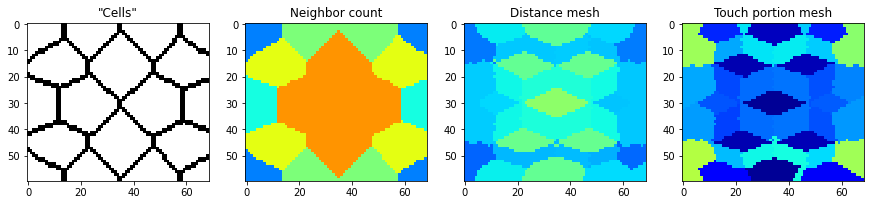

4


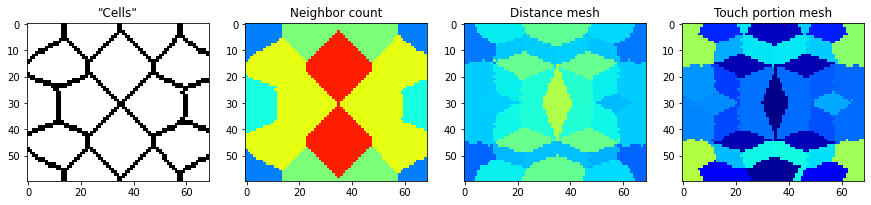

5


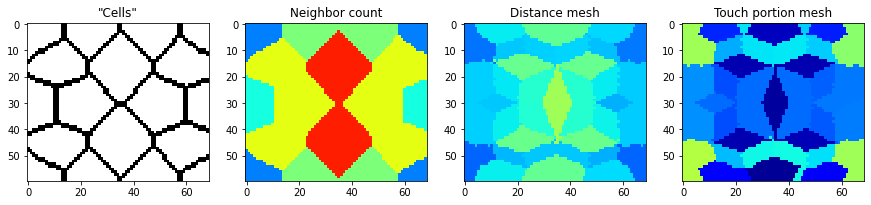

6


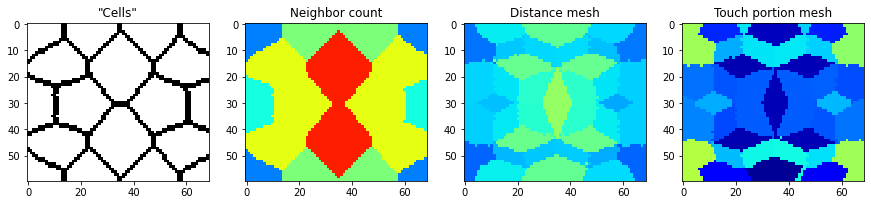

7


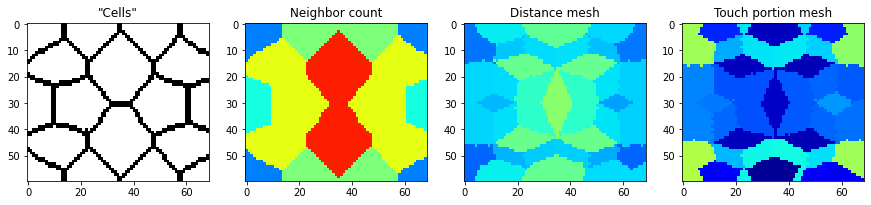

8


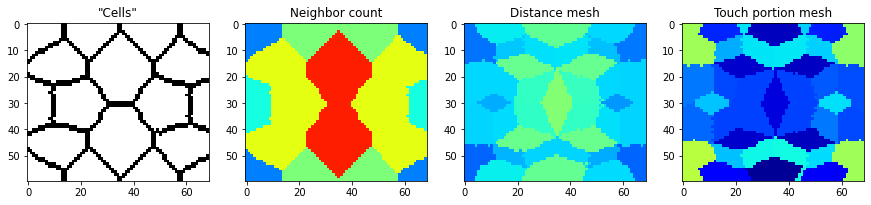

9


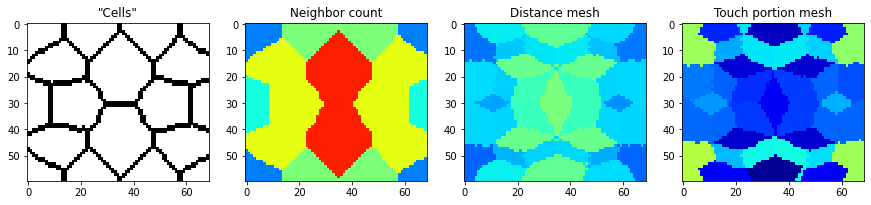

10


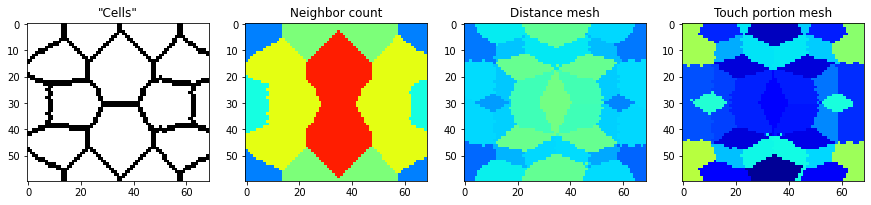

9


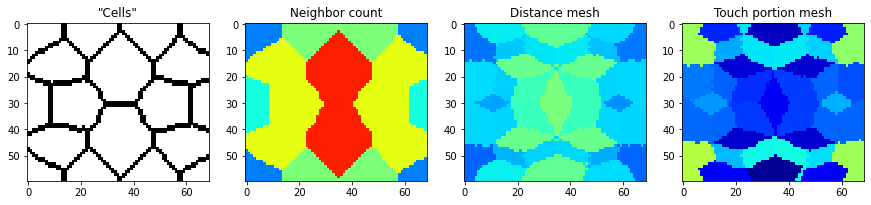

8


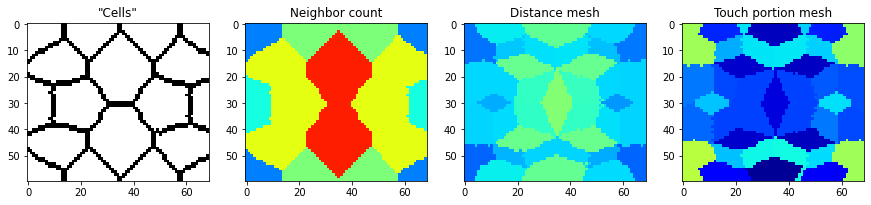

7


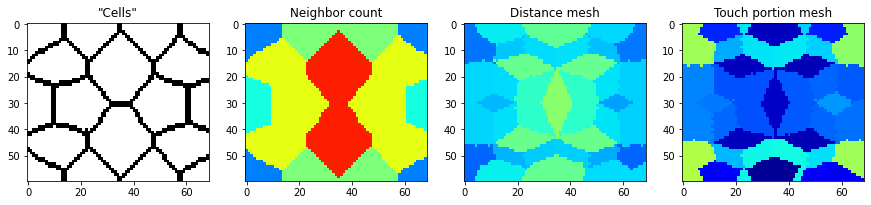

6


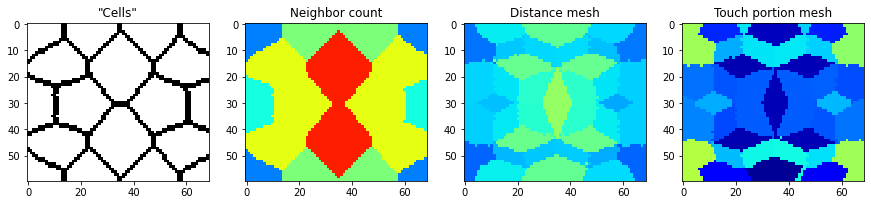

5


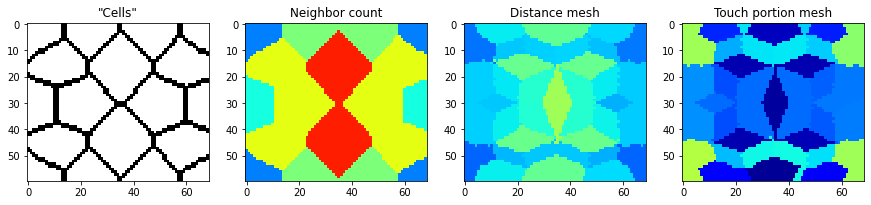

4


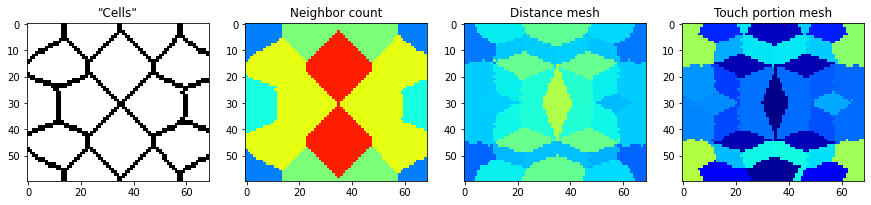

3


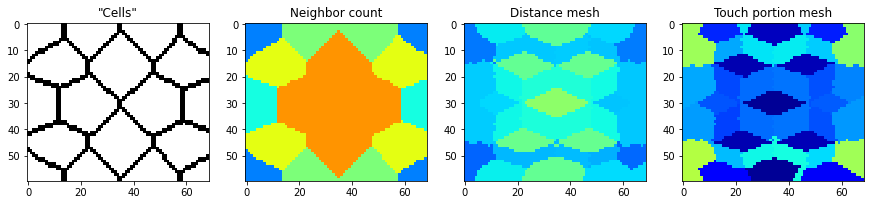

2


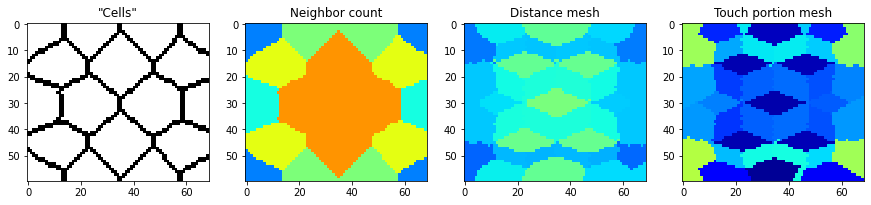

1


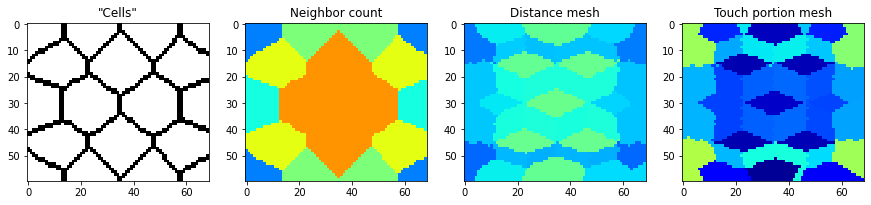

0


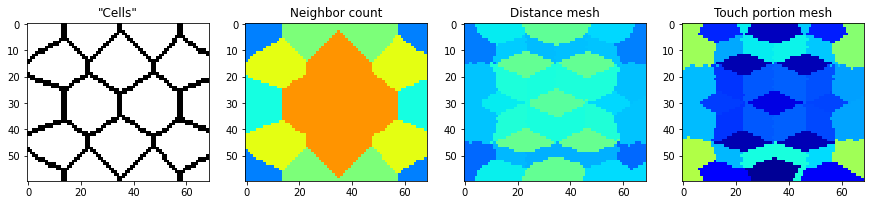

-1


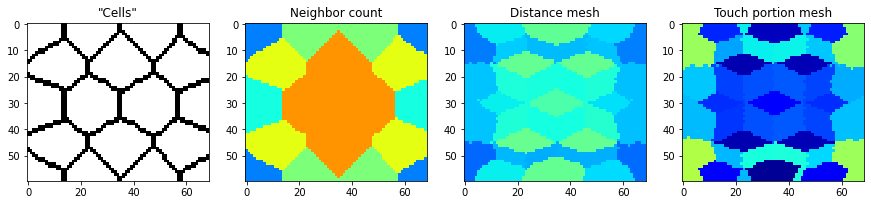

In [2]:
def demo_data(d=0):
    
    labels = cle.artificial_tissue_2d(random_sigma_x=0, random_sigma_y=0, width=75, height=65)
    centroids = np.asarray(cle.centroids_of_labels(labels))
    
    centroids[0, 8] = centroids[0, 8] - d
    centroids[0, 9] = centroids[0, 9] + d
    
    spots = cle.pointlist_to_labelled_spots(centroids)
    
    label_image = cle.extend_labeling_via_voronoi(spots)

    return label_image

for i, d in enumerate(list(range(-2, 10)) + list(range(10, -2, -1))):
    print(d)
    label_image = demo_data(d)
    
    fig, axs = plt.subplots(1,4, figsize=(15,15))
    
    axs[0].set_title("\"Cells\"")
    cle.imshow(cle.binary_not(cle.detect_label_edges(label_image)), plot=axs[0]) 
    axs[1].set_title("Neighbor count")
    cle.imshow(cle.touching_neighbor_count_map(label_image), 
               min_display_intensity=0,
               max_display_intensity=8,
               colormap="jet",
               plot=axs[1])
    axs[2].set_title("Distance mesh")
    cle.imshow(cle.fill_zeros_inpainting(cle.draw_distance_mesh_between_touching_labels(label_image)), 
               min_display_intensity=0,
               max_display_intensity=50,
               colormap="jet",
               plot=axs[2])
    axs[3].set_title("Touch portion mesh")
    cle.imshow(cle.fill_zeros_inpainting(cle.draw_touch_portion_mesh_between_touching_labels(label_image)), 
               min_display_intensity=0,
               max_display_intensity=1,
               colormap="jet",
               plot=axs[3])
    
    plt.savefig("temp/" + str(i).zfill(2) + ".tif", dpi=300)
    plt.show()